<h1> Titanic Dataset: Análise de exploração de dados</h1>
 
Neste notebook é feita a análise do data Titanic presente no Kaggle. Primeiro é feito a exploração e análise inicial dos dados.
 
Perguntas a serem respondidas:
 
<li>Quem são os passageiros do Titanic? (idade, gênero, classe...)</li>
<li>Localização do passageiro e relação com a sua classe.</li>
<li>De onde os passageiros são? </li>
<li>Quem estava sozinho e quem estava com a família? </li>
<li>Quais os fatores que ajudaram na sobrevivência? </li>



In [46]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

#Modelo ML
from sklearn.model_selection import cross_val_score

In [5]:
#O dataframe esta disponivel no Kaggle
titanic_df = pd.read_csv('train.csv')

In [6]:
#Informacoes do dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


É notável que estão faltando algumas informações no dataset. As informações que mais apresentam perda são as referentes a *cabine* e *idade*.


In [ ]:
#Verificando o cabecalho disposto no dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Descrevendo algumas informacoes do dataset
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 
Como a coluna de sobrevivência possui valor unitário, pode-se observar que a média de 38% das pessoas sobreviveram.


Verifiando dados que estao faltando no dataset

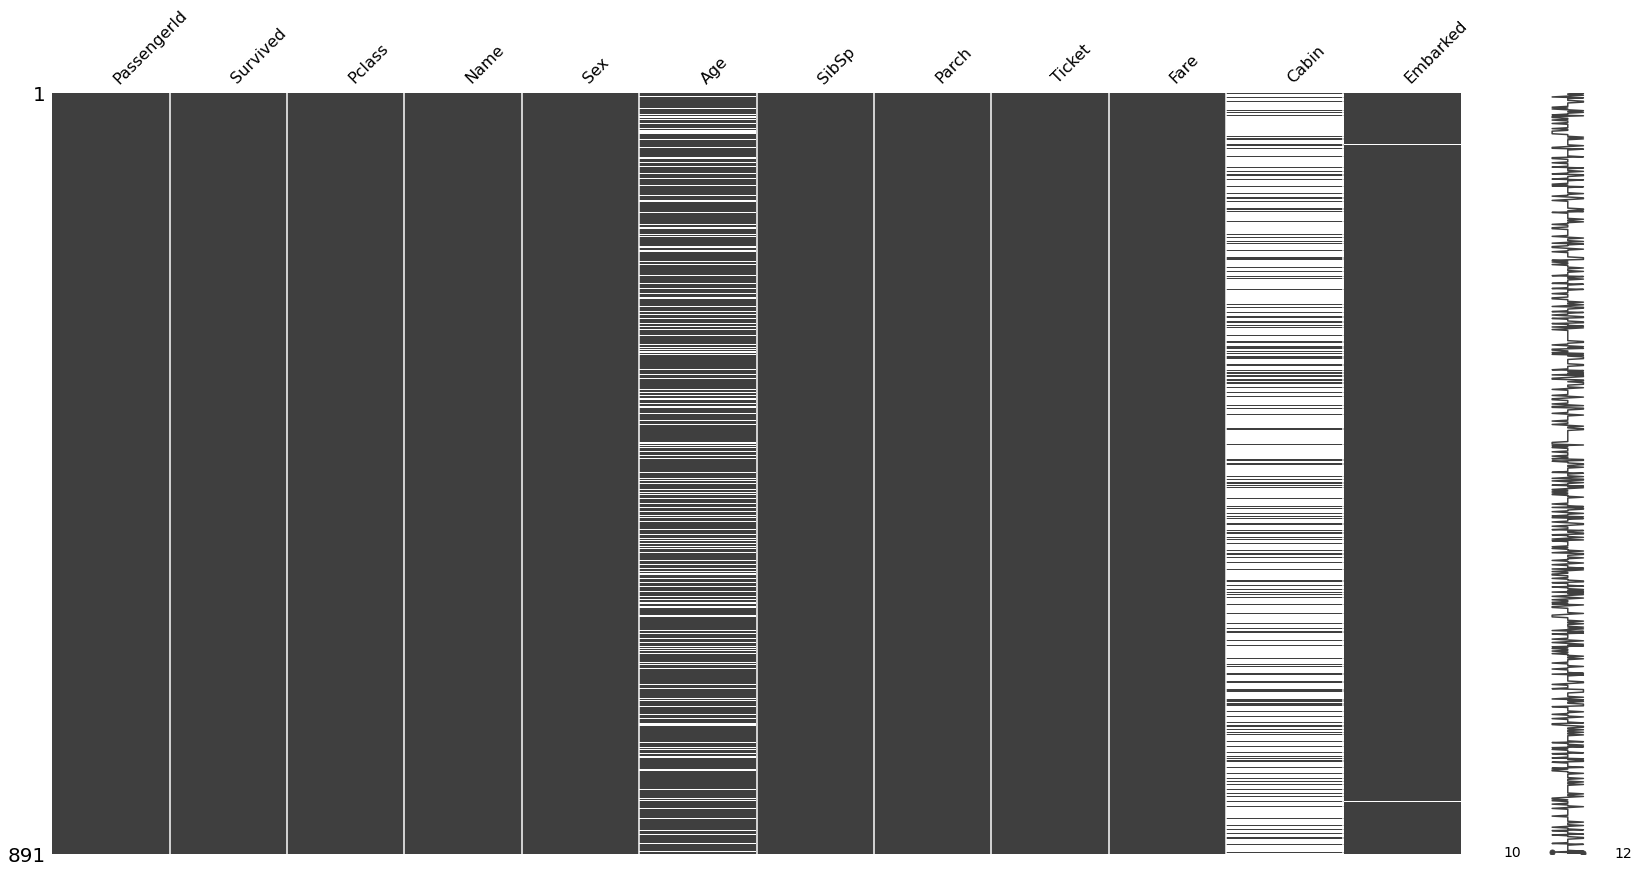

In [47]:
missingno.matrix(titanic_df, figsize =(28, 14))

In [ ]:
#Possivel topico tratamento de dados

<h1> Quem são os passageiros do Titanic? </h1>

Observando alguns dados demográficos sobre os passageiros:


<li>Sexo</li>

In [ ]:
titanic_df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

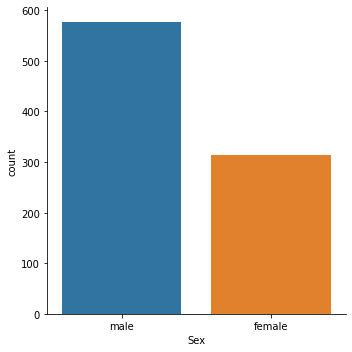

In [ ]:
sns.catplot(x='Sex', data=titanic_df, kind='count')

Ha muito mais mais pessoas do sexo masculino abordo do que do sexo femnino.

Observando agora em quais classes esses passageiros estavam:

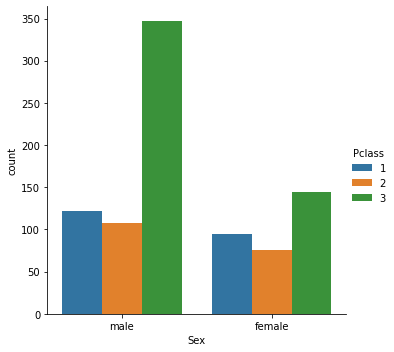

In [ ]:
sns.catplot(x='Sex', data=titanic_df, kind='count', hue='Pclass')

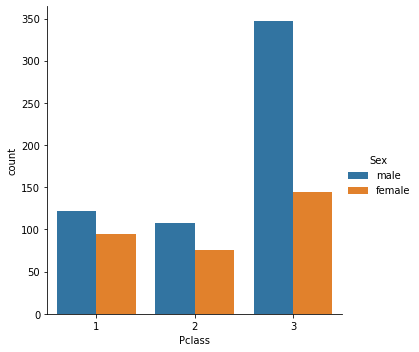

In [ ]:
sns.catplot(x='Pclass', data=titanic_df, kind='count', hue='Sex')

 
Para dar melhor clareza nos dados de sobrevivência uma boa tratativa e definir quais dos passageiros eram crianças.


In [ ]:
#funcao para auxiliar na transformacao
def idade_help(df_help):
  idade = df_help.Age
  sexo = df_help.Sex
  
  if idade < 16:
    return 'child'
  else:
    if sexo == 'male':
      return 'male'
    else:
      return 'female'    

In [ ]:
titanic_df['Person'] = titanic_df.apply(idade_help, axis = 1)

 
Novas avaliações com a quantidade de crianças:


In [ ]:
titanic_df.groupby('Person').size()

Person
child      83
female    271
male      537
dtype: int64

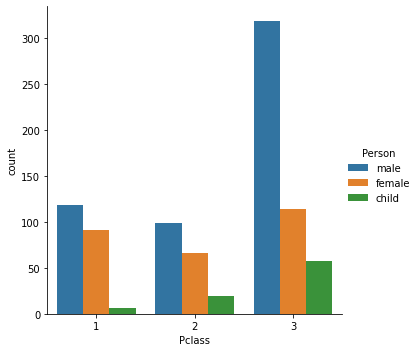

In [ ]:
sns.catplot(x='Pclass', data=titanic_df, kind='count', hue='Person')

Nota se que a maior quantidade de passageiros encontra-se na classe 3. 

<li>Idade</li>

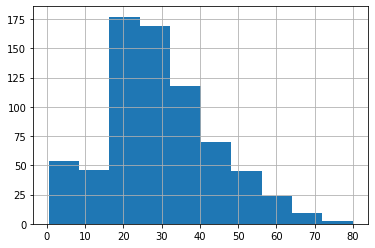

In [ ]:
titanic_df['Age'].hist()

A maior parte dos passageiros encontra-se com idades por volta de 20 a 40 anos. Utilizando um gráfico de distribuição das idade por classe, avalia-se melhor essa distribuição.


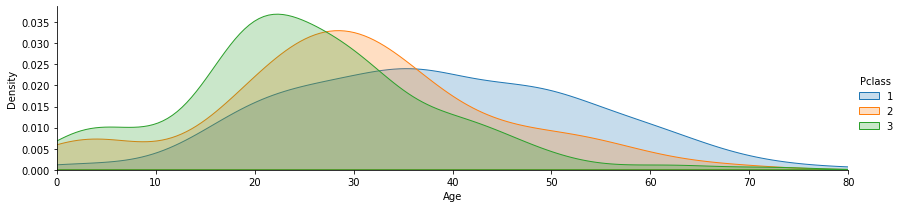

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


Percebe-se que a idade dos passageiros da classe 1 é mais avançada que as demais.


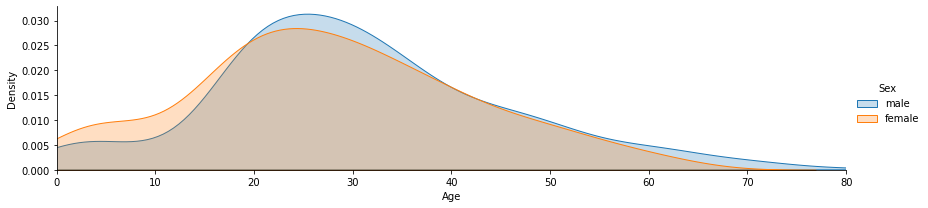

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


A idade dos passageiros não apresenta tanta diferença. Mas nota se que ha mais criancas do sexo femino e idosos do sexo masculino.



<h1>Localização do passageiro e relação com a sua classe e deck.</h1>


A cabine do passageiro contém informações também referentes a classe e deck. Como por exemplo um passageiro na cabine C102, a letra C indica o deck de localização e o número 102 a cabine. Em outras palavras temos o formato LNNN.

Como visto anteriormente a cabine possui muitas informações com valor NaN.

In [ ]:
titanic_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Para analise do deck com as informacoes que o dataframe possui, e necessario realizar a substituicao desses valores faltante NaN por 0.

In [ ]:
deck_df = titanic_df.dropna(axis=0)

In [ ]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


 
Para melhor a análise é necessário definir quais sao os decks em uma nova coluna no df. Para isso faz-se a extração dos dados de cabine.


In [ ]:
def level_help(passanger):
  cabin = passanger.Cabin
  return cabin[0]


In [ ]:
deck_df['Level'] = deck_df.apply(level_help, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
deck_df.Level

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Level, Length: 183, dtype: object

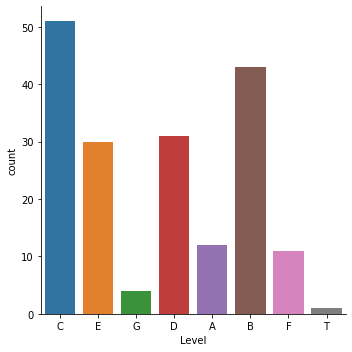

In [ ]:
sns.catplot(x='Level', data=deck_df, kind='count')

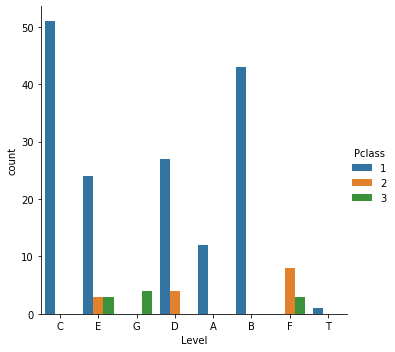

In [ ]:
sns.catplot(x='Level', data=deck_df, kind='count', hue='Pclass')

Passageiros da classe 1, encontram-se em sua maioria nas classes C,E,D e A. Os passageiros da classe 1 encontram-se exclusivamente nas A,B,C. Os demais passageiros encontram-se nas outras cabines. Tomar conclusões com essa quantidade de informação pode ser deliberado pois cerca de 3/4 dos dados do data frame estão perdidos.

<h1> De onde os passageiros sao? </h1>

As informações de embarque contidas no dataframe dizem respeito à origem dos passageiros conforme C = Cherbourg; Q = Queenstown; S = Southampton.

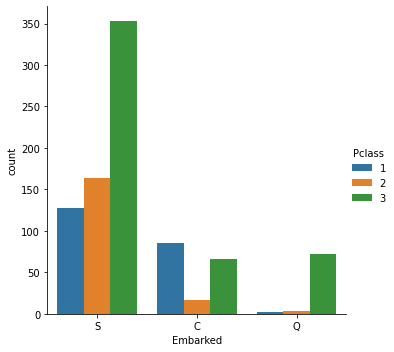

In [ ]:
sns.catplot(x='Embarked', data=titanic_df, kind='count', hue='Pclass')

A maior parte dos passageiros embarcaram em Southampton. Um segundo fato relevante e que na cidade de Queenstown quase nao houveram embarques de 1 e 2 classe dando a entender sobre a situacao socio-economica do local.

<h1>Quem estava sozinho e quem estava com a familia? </h1>

A campo SibSp refere-se aos filhos que cada pessoa possuía e o Parch aos pais ou crianças.

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Somando a quantidade de pessoas juntas.

In [ ]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [ ]:
titanic_df['Alone'].iloc[titanic_df['Alone']>0] = 'No'
titanic_df['Alone'].iloc[titanic_df['Alone']==0] = 'Yes'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
titanic_df.groupby('Alone').size()

Alone
No     354
Yes    537
dtype: int64

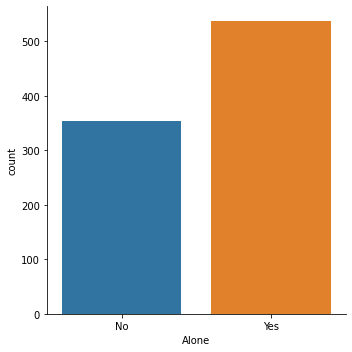

In [ ]:
sns.catplot(x='Alone', data=titanic_df, kind='count')

Avaliando as informações percebe-se que a maioria das pessoas estavam sozinhas.

<h1>Quais os fatores que ajudaram na sobrevivência
</h1>

Verificando graficamente os que sobreviveram conforme a classe.

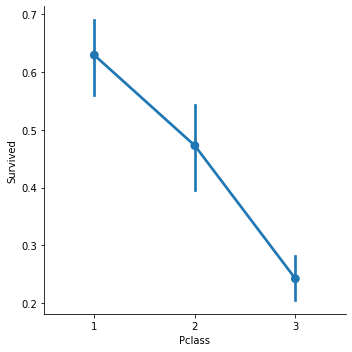

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point')

A maior parte dos sobreviventes encontra-se na primeira classe. Como protocolos da época, mulheres e crianças embarcaram primeiro nas embarcações de salva vidas.


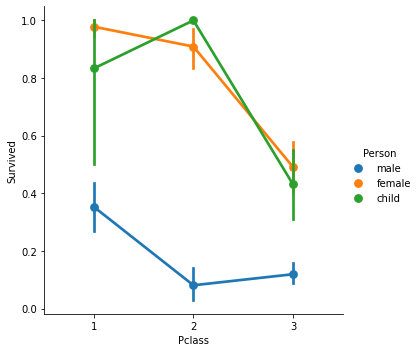

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point',hue='Person')

Os homens tinham menores chances de sobrevivência do que mulheres e crianças, pois tinham menor prioridade de serem salvos. Verificando a relação entre idade e os que foram salvos.


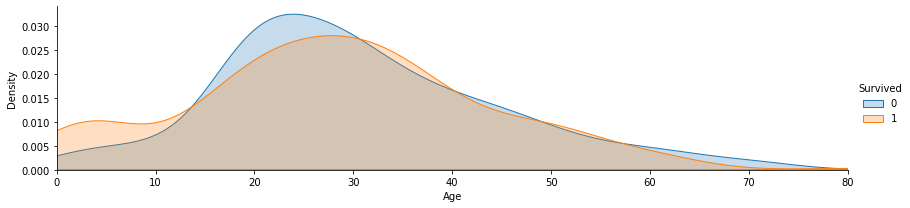

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Survived',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

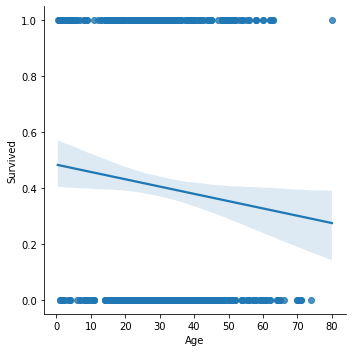

In [ ]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

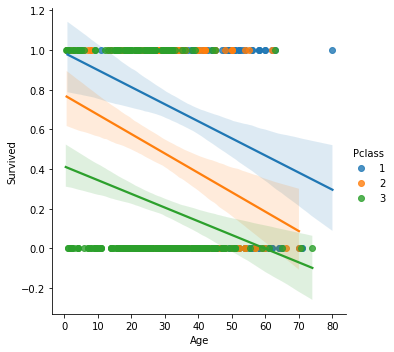

In [ ]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)

As curvas monstram que quanto mais velho menor a chance de ser salvo.

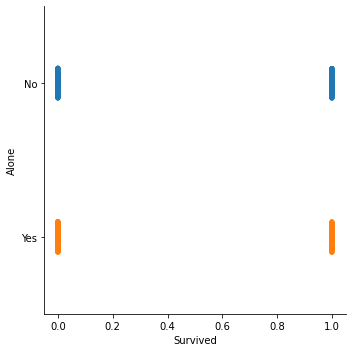

In [ ]:
sns.catplot(x='Survived',y='Alone',data=titanic_df)

Sobreviventes que estavam sozinhos.

In [ ]:
titanic_df[(titanic_df['Survived'] > 0) & (titanic_df['Alone'] == 'Yes' )].shape[0]

163

Sobreviventes que *não* estavam sozinhos.

In [ ]:
titanic_df[(titanic_df['Survived'] > 0) & (titanic_df['Alone'] == 'No' )].shape[0]

179

Não sobreviventes sozinhos.

In [ ]:
titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Alone'] == 'Yes' )].shape[0]

374

Não sobreviventes *não* sozinhos.

In [ ]:
titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Alone'] == 'No' )].shape[0]

175

Portanto conhecer alguem no navio preferia chance maior de sobrevivência do que estar sozinho. Para melhoria e verificar a chance de um passageiro sobreviver pode ser adicionar tecnicas de ML.

<h1> Machine Learning</h1>

O objetivo do uso de tecnicas de aprendizado de maquina (Machine Learning) é criar um modelo que preveja com precisão a sobrevivência de um passageiro. 

<h1>Random Forest Classifier</h1>

O algoritmo Random Forest Classifier ou floresta aleatória é um metodo estimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
#O dataframe esta disponivel no Kaggle
titanic_train_df = titanic_df
titanic_test_df = pd.read_csv('test.csv')

In [5]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
titanic_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Definicao dos arquivos de treino

In [13]:
header_x = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

In [14]:
labelencoder = LabelEncoder()
titanic_train_df.Sex = labelencoder.fit_transform(titanic_train_df.Sex)
titanic_train_df.Embarked = labelencoder.fit_transform(titanic_train_df.Embarked)

titanic_test_df.Sex = labelencoder.fit_transform(titanic_test_df.Sex)
titanic_test_df.Embarked = labelencoder.fit_transform(titanic_test_df.Embarked)

In [15]:
X_train = titanic_train_df[header_x]
y_train = titanic_train_df.Survived

X_train = X_train.fillna(-1)

Definicao dos arquivos de teste

In [16]:
X_test = titanic_test_df[header_x]
X_test = X_test.fillna(-1)

Treinando modelo

In [43]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

Resultado do modelo

In [46]:
predict_model_rfc = model.predict(X_test)

Numero de sobreviventes

In [49]:
predict_model_rfc.sum()

135

Exportando resultado para kaggle

In [58]:
sub = pd.Series(predict_model_rfc ,index=titanic_test_df['PassengerId'], name='Survived')
sub.to_csv('segundo_modelo.csv', header=True)

In [59]:
!head -n10 primeiro_modelo.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,1


In [55]:
#Resposta kaggle 0.75837

AttributeError: ignored

Verificar resultado

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

<h1> KNeighborsClassifier</h1>

O algoritmo de k-vizinhos mais próximos, também conhecido como KNN ou k-NN, é um classificador de aprendizado supervisionado não paramétrico, que usa a proximidade para fazer classificações ou previsões sobre o agrupamento de um ponto de dados individual.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#O dataframe esta disponivel no Kaggle
titanic_train_df = pd.read_csv('train.csv')
titanic_test_df = pd.read_csv('test.csv')

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predict_model_knn = knn.predict(X_test)

In [19]:
predict_model_knn.sum()

116

In [24]:
sub = pd.Series(predict_model_knn ,index=titanic_test_df['PassengerId'], name='Survived')
sub.to_csv('terceiro_modelo.csv', header=True)

In [26]:
!head -n10 terceiro_modelo.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,1
900,0


In [ ]:
#Resposta kaggle 0.64114

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

78.11

<h1>Regressão Logística </h1>

A regressão logística é um modelo estatístico usado para determinar a probabilidade de um evento acontecer. Ele mostra a relação entre os recursos e, em seguida, calcula a probabilidade de um determinado resultado.

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [35]:
predict_logmodel = logmodel.predict(X_test)

In [36]:
predict_logmodel.sum()

164

In [37]:
sub = pd.Series(predict_logmodel ,index=titanic_test_df['PassengerId'], name='Survived')
sub.to_csv('quarto_modelo.csv', header=True)

In [38]:
!head -n10 quarto_modelo.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [ ]:
#Resposta kaggle 0.75119

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


78.68

<h1> Support Vector Classifier </h1>

In [39]:
from sklearn.svm import SVC

In [40]:
svcmodel = SVC()
svcmodel.fit(X_train,y_train)

SVC()

In [41]:
predict_svcmodel = svcmodel.predict(X_test)

In [42]:
predict_svcmodel.sum()

15

In [44]:
sub = pd.Series(predict_svcmodel ,index=titanic_test_df['PassengerId'], name='Survived')
sub.to_csv('quinto_modelo.csv', header=True)

In [45]:
!head -n10 quinto_modelo.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,0


In [48]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61452514 0.63483146 0.65168539 0.64044944 0.65168539]
0.6386353650116126
